In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# About the dataset

    Age : Age of the patient

    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic

    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    thalach : maximum heart rate achieved

    target :
      0= less chance of heart attack
      1= more chance of heart attack


# Processamento de datas

In [ ]:
dataHearth = pd.read_csv('/content/drive/MyDrive/Kaggle/HearthAttack/data/heart.csv')

print('Hearth Shape:', dataHearth.shape)
print('Columns:', dataHearth.columns)

Hearth Shape: (303, 14)
Columns: Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [ ]:
dataHearth.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataHearth.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
print('Before:', dataHearth.duplicated().sum())
dataHearth = dataHearth.drop_duplicates()
print('After:', dataHearth.duplicated().sum())

Before: 1
After: 0


# Análise Exploratória

In [ ]:
dataHearth.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataHearth.loc[dataHearth['output'] == 0].describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [ ]:
dataHearth.loc[dataHearth['output'] == 1].describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.0
mean,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951,1.0
std,9.511957,0.497788,0.953878,16.204739,53.456580,0.348303,0.505358,19.199080,0.348303,0.781734,0.594598,0.802137,0.467082,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.750000,0.000000,1.000000,120.000000,208.750000,0.000000,0.000000,148.750000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.500000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.250000,0.000000,1.000000,172.000000,0.000000,1.025000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


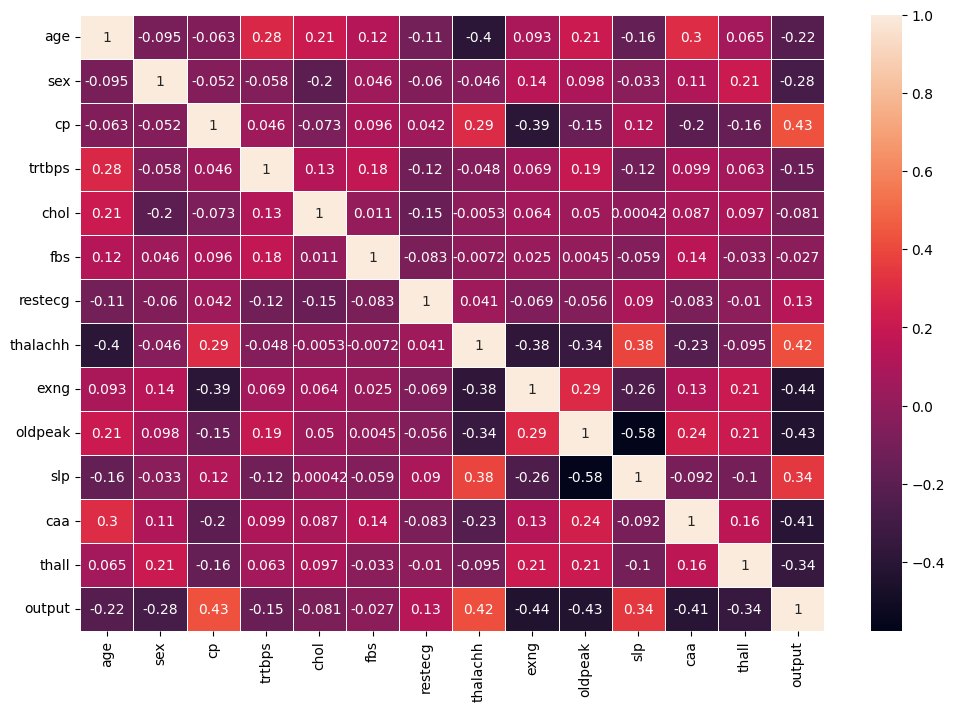

In [ ]:
corr = dataHearth.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, linewidths=0.6)
plt.show()

In [ ]:
xVars = ['age', 'cp', 'thalachh', 'slp', 'exng', 'oldpeak']
yVars = ['age', 'cp', 'thalachh', 'slp', 'exng', 'oldpeak']

g = sns.PairGrid(dataHearth, hue='output', x_vars=xVars, y_vars=yVars )
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

NameError: ignored

## Functions

In [ ]:
def histPlot(var, var0, var1, label, nBins=10, nAlpha=0.5, KDE=True):
  fig, ax = plt.subplots(1, 4, figsize=(20, 4))

  sns.histplot(var.values, bins=nBins, alpha=nAlpha, color='blue', ax=ax[0], kde=KDE, element='step')
  ax[0].set_title('All')
  ax[0].set_xlabel('Age')
  ax[0].set_ylabel('Frequency')

  sns.histplot(var0.values, bins=nBins, alpha=nAlpha, color='green', ax=ax[1], kde=KDE, element='step')
  ax[1].set_title('Peoples without heart attack')
  ax[1].set_xlabel('Age')
  ax[1].set_ylabel('Frequency')

  sns.histplot(var1.values, bins=nBins, alpha=nAlpha, color='red', ax=ax[2], kde=KDE, element='step')
  ax[2].set_title('Peoples with heart attack')
  ax[2].set_xlabel('Age')
  ax[2].set_ylabel('Frequency')

  sns.histplot(var0.values, bins=nBins, alpha=nAlpha, color='green', ax=ax[3], kde=KDE, element='step')
  sns.histplot(var1.values, bins=nBins, alpha=nAlpha, color='red', ax=ax[3], kde=KDE, element='step')
  ax[3].set_title('Comparation')
  ax[3].set_xlabel('Age')
  ax[3].set_ylabel('Frequency')

  plt.show()

In [ ]:
def boxPlot(label):
  plt.figure(figsize=(10, 4))
  sns.boxplot(data=dataHearth, y=label, x='output')
  plt.show()

In [ ]:
def barPlot(categories, var, var0, var1, label):
  fig, ax = plt.subplots(1, 3, figsize=(20, 4))

  sns.barplot(x=categories, y=var, ax=ax[0], palette='pastel')
  ax[0].set_title('All')
  ax[0].set_xlabel(label)
  ax[0].set_ylabel('Frequency')

  sns.barplot(x=categories, y=var0, ax=ax[1], palette='pastel')
  ax[1].set_title('Peoples without heart attack')
  ax[1].set_xlabel(label)
  ax[1].set_ylabel('Frequency')

  sns.barplot(x=categories, y=var1, ax=ax[2], palette='pastel')
  ax[2].set_title('Peoples with heart attack')
  ax[2].set_xlabel(label)
  ax[2].set_ylabel('Frequency')

  plt.tight_layout()

plt.show()

In [ ]:
def piePlot(categories, var, var0, var1):
  fig, ax = plt.subplots(1, 3, figsize=(20, 4))
  sns.set(style="whitegrid")

  ax[0].pie(var, labels=categories, autopct='%1.1f%%', startangle=140)
  ax[0].set_title('All')

  ax[1].pie(var0, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
  ax[1].set_title('Peoples without heart attack')

  ax[2].pie(var1, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
  ax[2].set_title('Peoples with heart attack')

  plt.show()

In [ ]:
def scatterPlot(var0, var1):
  sns.set(style="whitegrid")

  sns.scatterplot(x=var0, y=np.zeros(len(var0)), color='green', label='var0')

  sns.scatterplot(x=var1, y=np.ones(len(var1)), color='red', label='var1')

  plt.xlabel('X-axis Label')
  plt.ylabel('Y-axis Label')
  plt.legend()

  plt.figure(figsize=(8, 6))

  plt.show()

  plt.show()

In [ ]:
def getDataColumn(label):
  var = dataHearth[label]
  var0 = dataHearth.loc[dataHearth['output'] == 0, label]
  var1 = dataHearth.loc[dataHearth['output'] == 1, label]

  return var, var0, var1

## age


In [ ]:
ages, ages0, ages1 = getDataColumn('age')

In [ ]:
ages.describe()

count    302.00000
mean      54.42053
std        9.04797
min       29.00000
25%       48.00000
50%       55.50000
75%       61.00000
max       77.00000
Name: age, dtype: float64

In [ ]:
ages0.describe()

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
ages1.describe()

count    164.000000
mean      52.585366
std        9.511957
min       29.000000
25%       44.750000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

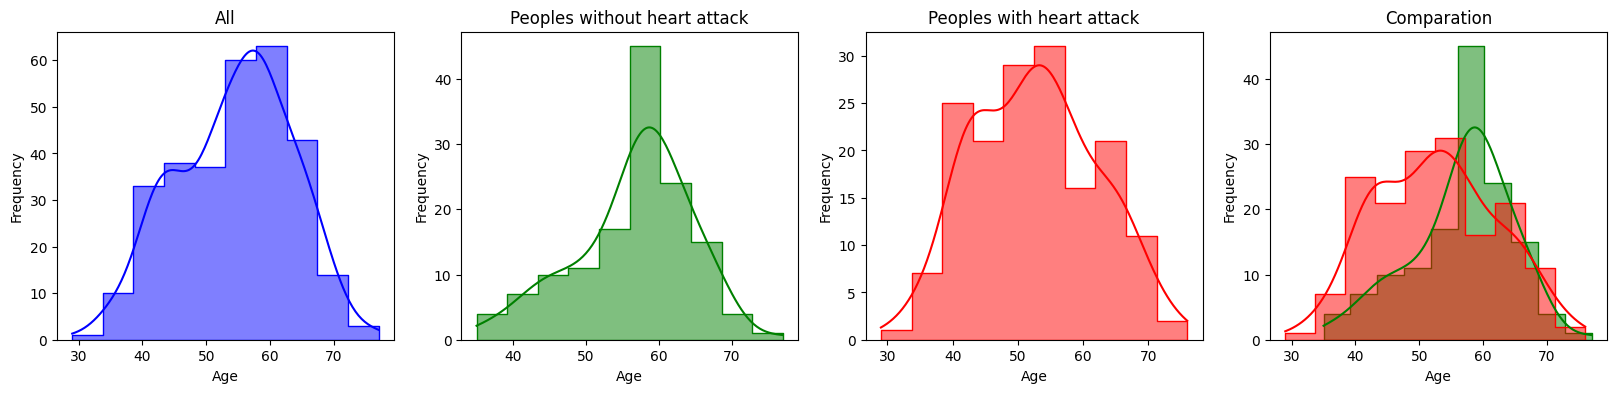

In [ ]:
nBins = 10
nAlpha = 0.5
KDE = True

fig, ax = plt.subplots(1, 4, figsize=(20, 4))

sns.histplot(ages.values, bins=nBins, alpha=nAlpha, color='blue', ax=ax[0], kde=KDE, element='step')
ax[0].set_title('All')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

sns.histplot(ages0.values, bins=nBins, alpha=nAlpha, color='green', ax=ax[1], kde=KDE, element='step')
ax[1].set_title('Peoples without heart attack')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

sns.histplot(ages1.values, bins=nBins, alpha=nAlpha, color='red', ax=ax[2], kde=KDE, element='step')
ax[2].set_title('Peoples with heart attack')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Frequency')

sns.histplot(ages0.values, bins=nBins, alpha=nAlpha, color='green', ax=ax[3], kde=KDE, element='step')
sns.histplot(ages1.values, bins=nBins, alpha=nAlpha, color='red', ax=ax[3], kde=KDE, element='step')
ax[3].set_title('Comparation')
ax[3].set_xlabel('Age')
ax[3].set_ylabel('Frequency')

plt.show()

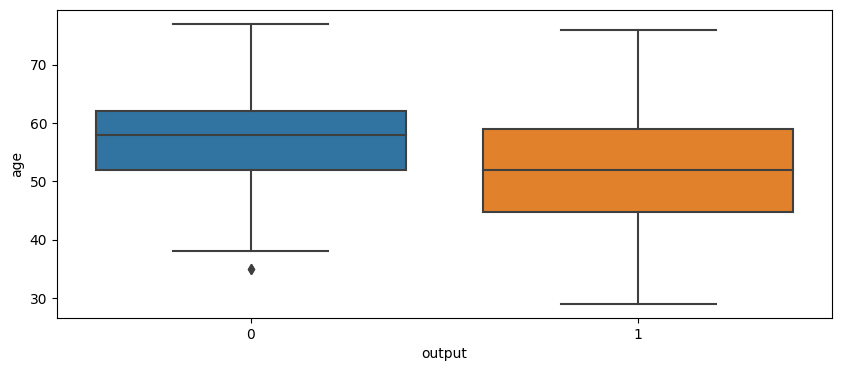

In [ ]:
boxPlot('age')

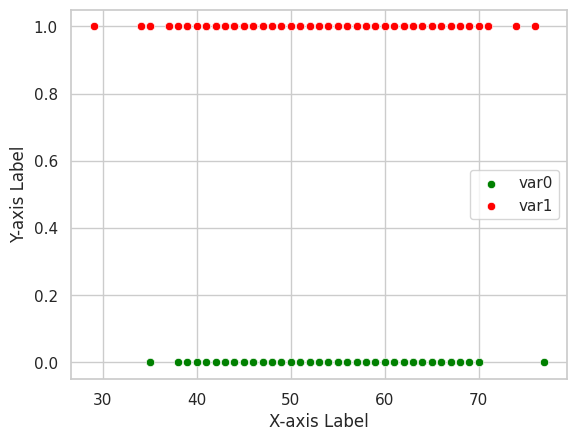

<Figure size 800x600 with 0 Axes>

In [ ]:
scatterPlot(ages0, ages1)

## cp : Chest Pain

In [ ]:
cp, cp0, cp1 = getDataColumn('cp')

In [ ]:
cp.describe()

count    302.000000
mean       0.963576
std        1.032044
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [ ]:
cp0.describe()

count    138.000000
mean       0.478261
std        0.905920
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: cp, dtype: float64

In [ ]:
cp1.describe()


count    164.000000
mean       1.371951
std        0.953878
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64

In [ ]:
categoriesCp, categoriesCpCount = np.unique(cp.values, return_counts=True)

print(categoriesCp, categoriesCpCount)

[0 1 2 3] [143  50  86  23]


In [ ]:
_, categoriesCp0Count = np.unique(cp0.values, return_counts=True)

print(categoriesCp, categoriesCpCount)

[0 1 2 3] [143  50  86  23]


In [ ]:
_, categoriesCp1Count = np.unique(cp1.values, return_counts=True)

print(categoriesCp, categoriesCp1Count)

[0 1 2 3] [39 41 68 16]


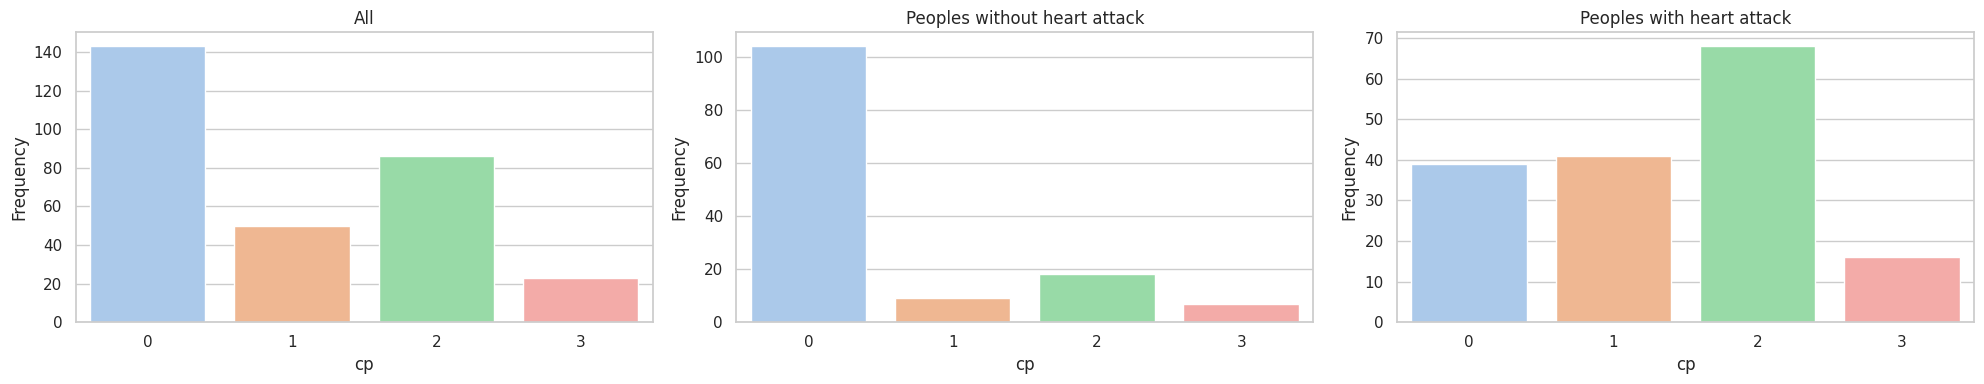

In [ ]:
barPlot(categoriesCp, categoriesCpCount, categoriesCp0Count, categoriesCp1Count, 'cp')

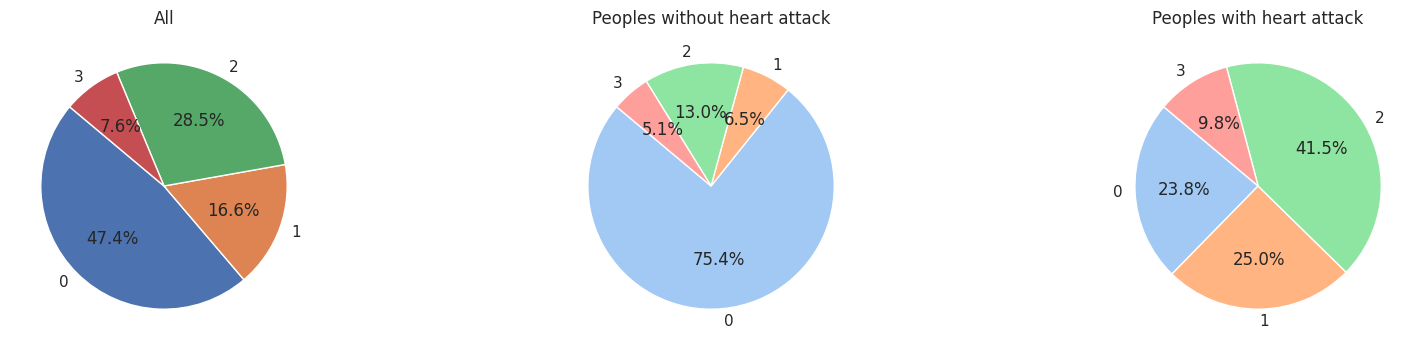

In [ ]:
piePlot(categoriesCp, categoriesCpCount, categoriesCp0Count, categoriesCp1Count)

## thalach : maximum heart rate achieved

In [ ]:
thalach, thalach0, thalach1 = getDataColumn('thalachh')

In [ ]:
thalach.describe()

count    302.000000
mean     149.569536
std       22.903527
min       71.000000
25%      133.250000
50%      152.500000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

In [ ]:
thalach0.describe()

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalachh, dtype: float64

In [ ]:
thalach1.describe()

count    164.000000
mean     158.378049
std       19.199080
min       96.000000
25%      148.750000
50%      161.000000
75%      172.000000
max      202.000000
Name: thalachh, dtype: float64

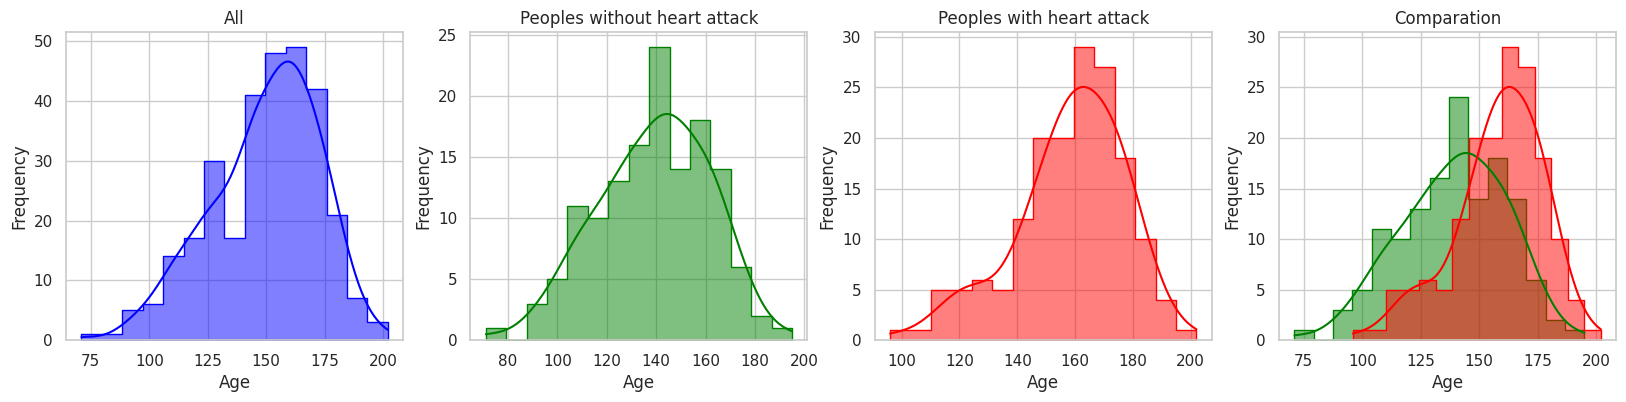

In [ ]:
histPlot(thalach, thalach0, thalach1, 'thalach', nBins=15)

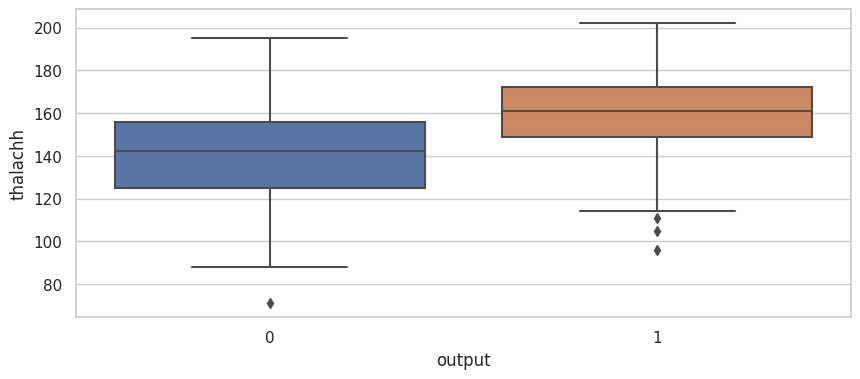

In [ ]:
boxPlot('thalachh')

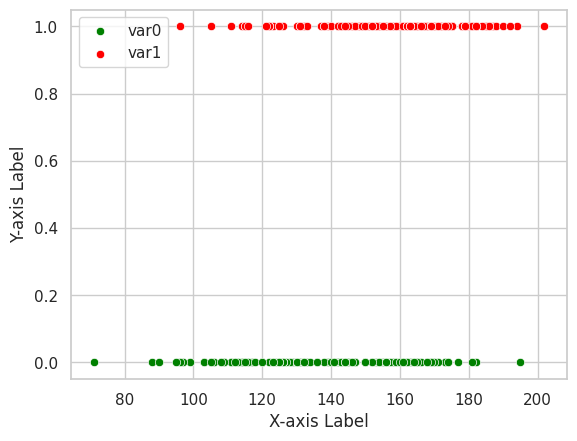

<Figure size 800x600 with 0 Axes>

In [ ]:
scatterPlot(thalach0, thalach1)

## slp

In [ ]:
slp, slp0, slp1 = getDataColumn('slp')

In [ ]:
categoriesSlp, categoriesSlpCount = np.unique(slp.values, return_counts=True)

print(categoriesSlp, categoriesSlpCount)

[0 1 2] [ 21 140 141]


In [ ]:
_, categoriesSlp0Count = np.unique(slp0.values, return_counts=True)

print(categoriesSlp, categoriesSlp0Count)

[0 1 2] [12 91 35]


In [ ]:
_, categoriesSlp1Count = np.unique(slp1.values, return_counts=True)

print(categoriesSlp, categoriesSlp1Count)

[0 1 2] [  9  49 106]


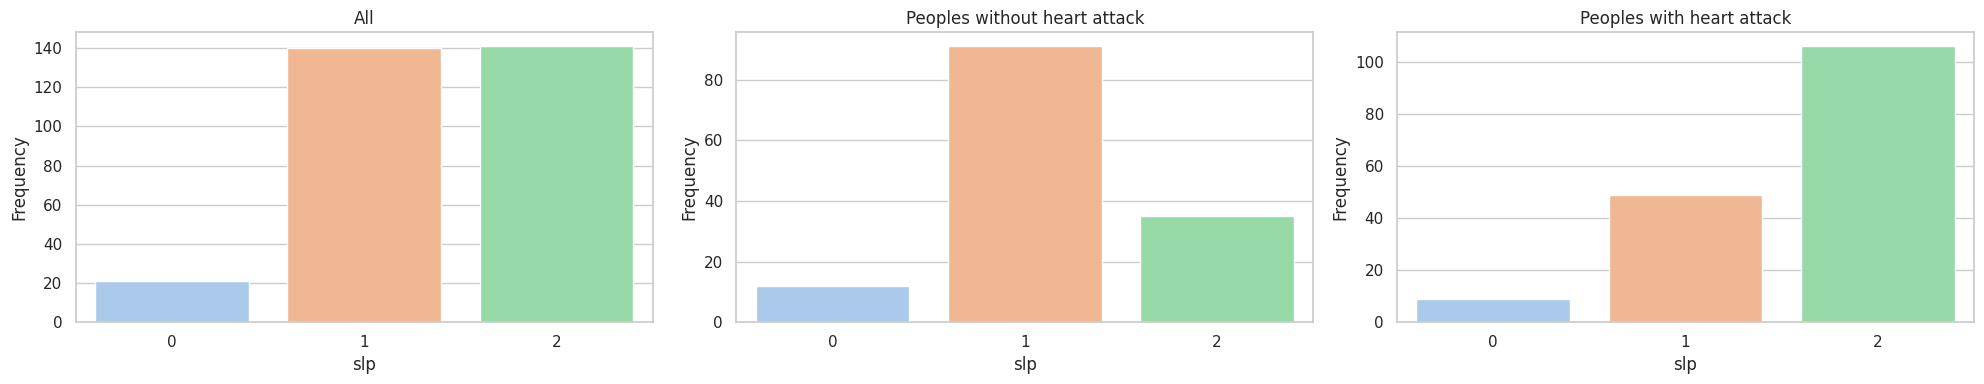

In [ ]:
barPlot(categoriesSlp, categoriesSlpCount, categoriesSlp0Count, categoriesSlp1Count, 'slp')

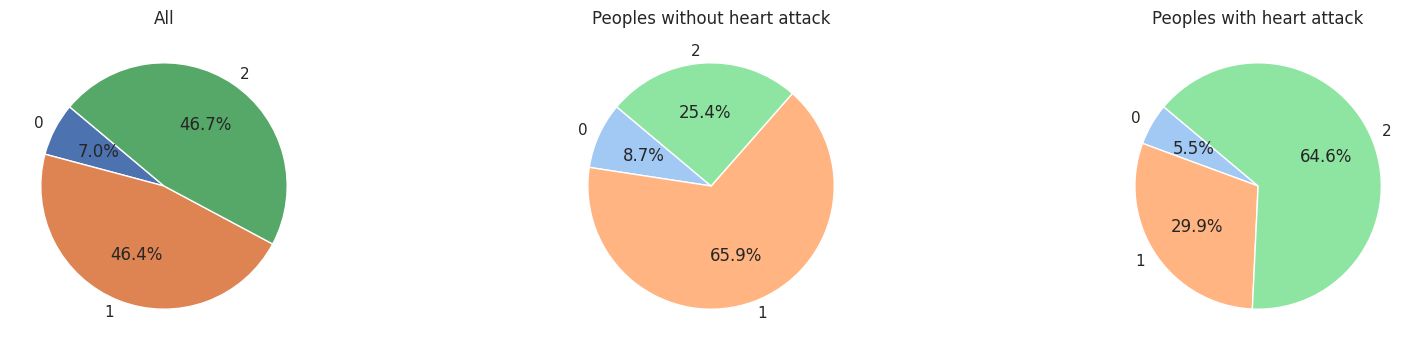

In [ ]:
piePlot(categoriesSlp, categoriesSlpCount, categoriesSlp0Count, categoriesSlp1Count)

## exng : exercise induced angina

In [ ]:
exng, exng0, exng1 = getDataColumn('exng')

In [ ]:
categoriesExng, exngCount = np.unique(exng.values, return_counts=True)

print(categoriesExng, exngCount)

[0 1] [203  99]


In [ ]:
_, exng0Count = np.unique(exng0.values, return_counts=True)

print(categoriesExng, exng0Count)

[0 1] [62 76]


In [ ]:
_, exng1Count = np.unique(exng1.values, return_counts=True)

print(categoriesExng, exng1Count)

[0 1] [141  23]


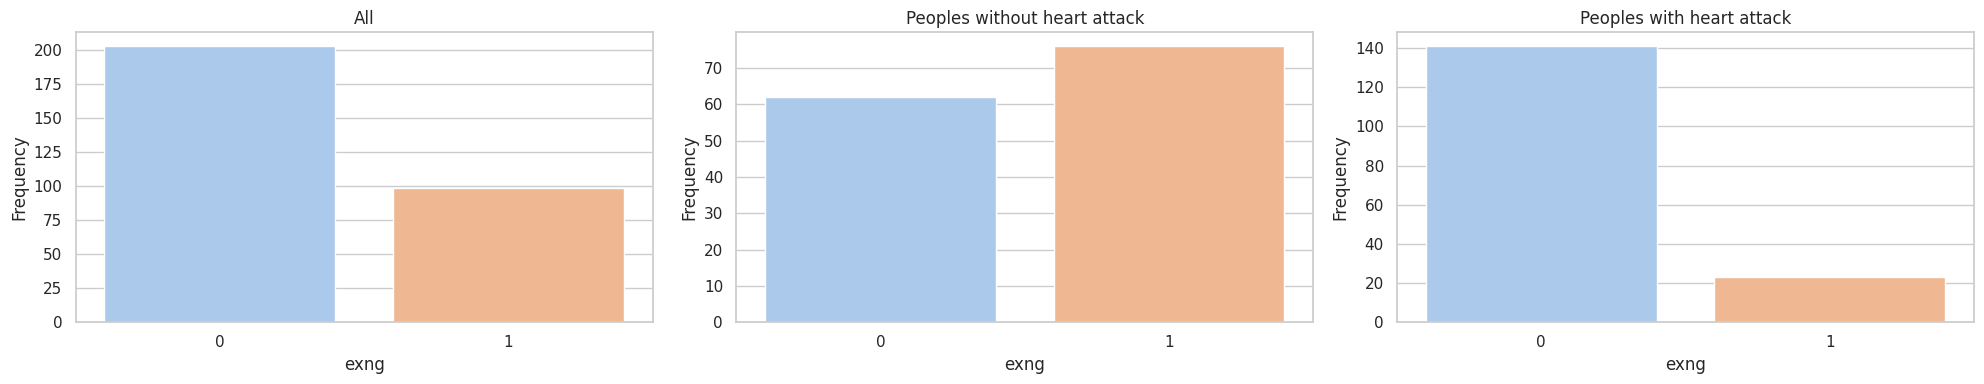

In [ ]:
barPlot(categoriesExng, exngCount, exng0Count, exng1Count, 'exng')

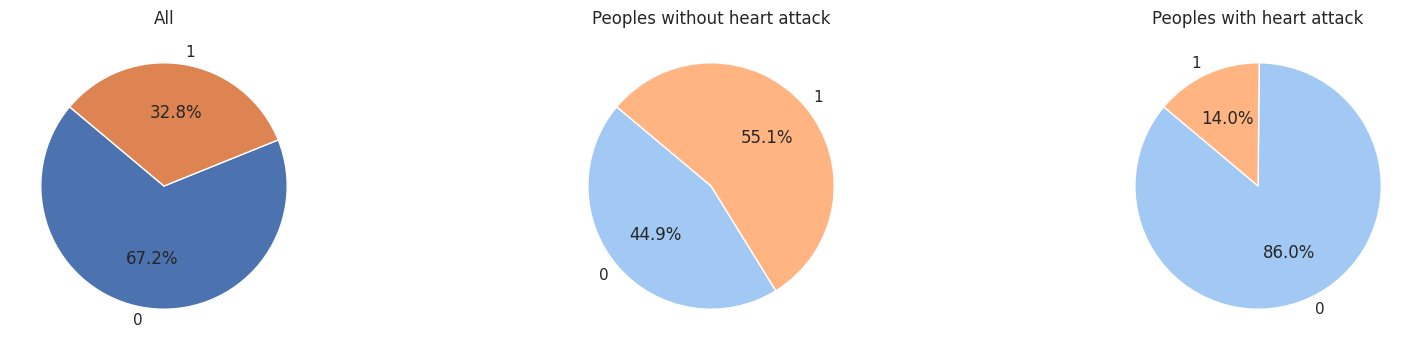

In [ ]:
piePlot(categoriesExng, exngCount, exng0Count, exng1Count)

## oldpeak : Previous peak

In [ ]:
oldPeak, oldPeak0, oldPeak1 = getDataColumn('oldpeak')

In [ ]:
oldPeak.describe()

count    302.000000
mean       1.043046
std        1.161452
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [ ]:
oldPeak0.describe()

count    138.000000
mean       1.585507
std        1.300340
min        0.000000
25%        0.600000
50%        1.400000
75%        2.500000
max        6.200000
Name: oldpeak, dtype: float64

In [ ]:
oldPeak1.describe()

count    164.000000
mean       0.586585
std        0.781734
min        0.000000
25%        0.000000
50%        0.200000
75%        1.025000
max        4.200000
Name: oldpeak, dtype: float64

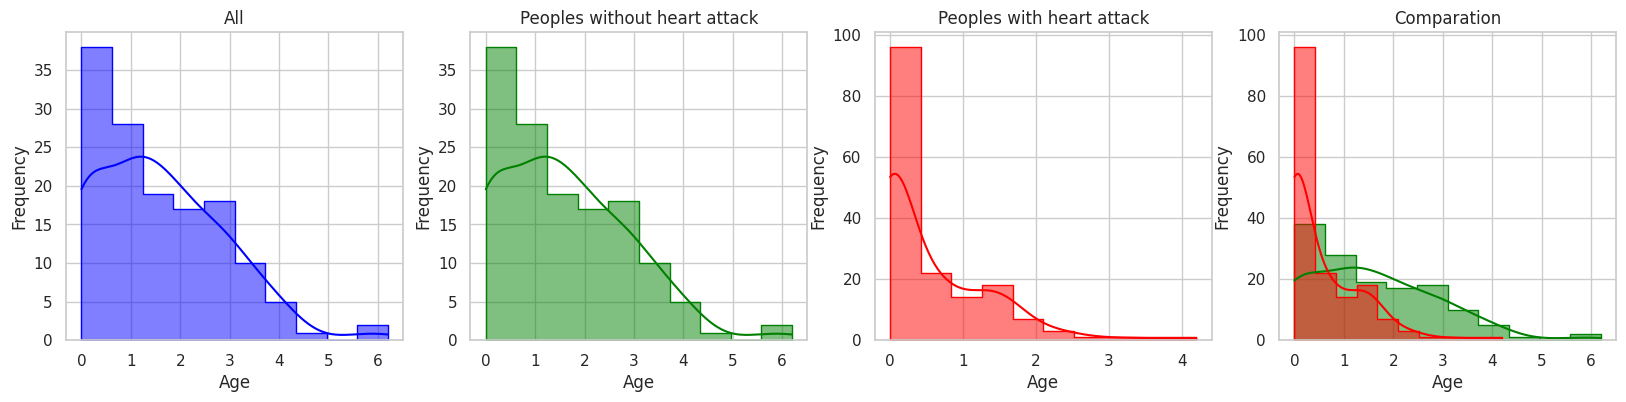

In [ ]:
histPlot(oldPeak0, oldPeak0, oldPeak1, 'oldpeak')

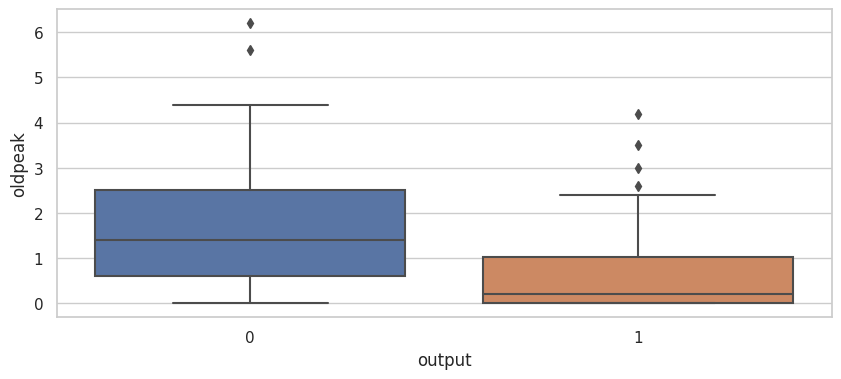

In [ ]:
boxPlot('oldpeak')

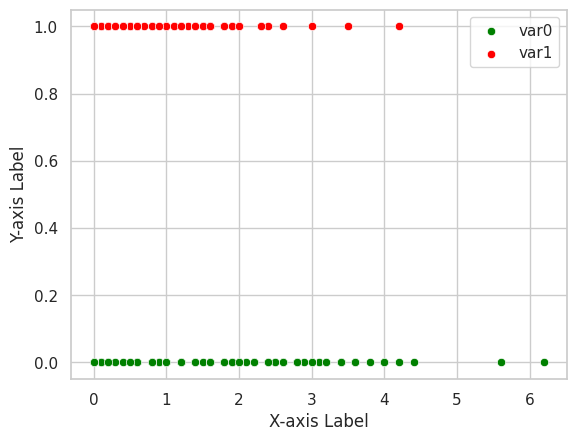

<Figure size 800x600 with 0 Axes>

In [ ]:
scatterPlot(oldPeak0, oldPeak1)

# Modelos

In [ ]:
def normalize():
  x = dataHearth.values
  minMaxScaler = preprocessing.MinMaxScaler()
  xScaled = minMaxScaler.fit_transform(x)
  df = pd.DataFrame(xScaled, columns=dataHearth.columns)
  return df

In [ ]:
df = normalize()

X = df.drop('output', axis=1).values
Y = df['output'].values

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0
5,0.583333,1.0,0.000000,0.433962,0.150685,0.0,0.5,0.587786,0.0,0.064516,0.5,0.0,0.333333,1.0
6,0.562500,0.0,0.333333,0.433962,0.383562,0.0,0.0,0.625954,0.0,0.209677,0.5,0.0,0.666667,1.0
7,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.0,1.000000,1.0
8,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.5,0.694656,0.0,0.080645,1.0,0.0,1.000000,1.0
9,0.583333,1.0,0.666667,0.528302,0.095890,0.0,0.5,0.786260,0.0,0.258065,1.0,0.0,0.666667,1.0


In [ ]:
def getModel(name):
  match name:
    case 'linear':
      model = LinearRegression()
    case 'tree':
      model = DecisionTreeClassifier()
    case 'forest':
      model = RandomForestClassifier()
    case 'naive bayes':
      model = GaussianNB()
    case 'knn':
      model = KNeighborsClassifier()
    case 'svm':
      model = svm.SVC(kernel='linear')
    case 'logistic':
      model = LogisticRegression(solver='lbfgs',
                                 max_iter=1000)
    case 'neural network':
      model = MLPClassifier(max_iter=2500,
                          tol=1e-20,
                          verbose=True,
                          learning_rate='adaptive',
                          solver='adam',
                          activation='logistic',
                          hidden_layer_sizes=(3,3))

  return model

In [ ]:
modelsName = ['linear', 'tree', 'forest', 'naive bayes', 'knn', 'svm', 'logistic', 'neural network']
data = []

for _ in range(10):
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.25, random_state=42)

  for name in modelsName:
      model = getModel(name)
      model.fit(Xtrain, Ytrain)
      modelPredicts = model.predict(Xtest)

      score = model.score(Xtest, Ytest)
      mae = mean_absolute_error(Ytest, modelPredicts)
      mse = mean_squared_error(Ytest, modelPredicts)

      data.append([name, score, mae, mse])

res = pd.DataFrame(data, columns=['Model', 'Score', 'Mean Absolute Error', 'Mean Squared Error'])

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 53, loss = 0.77174478
Iteration 54, loss = 0.77067152
Iteration 55, loss = 0.76952455
Iteration 56, loss = 0.76845147
Iteration 57, loss = 0.76736706
Iteration 58, loss = 0.76625097
Iteration 59, loss = 0.76512508
Iteration 60, loss = 0.76402947
Iteration 61, loss = 0.76285905
Iteration 62, loss = 0.76172036
Iteration 63, loss = 0.76061453
Iteration 64, loss = 0.75939993
Iteration 65, loss = 0.75830639
Iteration 66, loss = 0.75727273
Iteration 67, loss = 0.75619909
Iteration 68, loss = 0.75522978
Iteration 69, loss = 0.75429574
Iteration 70, loss = 0.75338695
Iteration 71, loss = 0.75251387
Iteration 72, loss = 0.75168244
Iteration 73, loss = 0.75081299
Iteration 74, loss = 0.74999686
Iteration 75, loss = 0.74913059
Iteration 76, loss = 0.74838221
Iteration 77, loss = 0.74756710
Iteration 78, loss = 0.74677819
Iteration 79, loss = 0.74605208
Iteration 80, loss = 0.74537099
Iteration 81, loss = 0.74467678
Iteration 82,

In [ ]:
print(res.groupby('Model').mean().reset_index().sort_values(by='Score', ascending=True))

            Model     Score  Mean Absolute Error  Mean Squared Error
2          linear  0.516397             0.275569            0.120147
7            tree  0.778947             0.221053            0.221053
1             knn  0.815789             0.184211            0.184211
3        logistic  0.828947             0.171053            0.171053
6             svm  0.828947             0.171053            0.171053
0          forest  0.855263             0.144737            0.144737
5  neural network  0.867105             0.132895            0.132895
4     naive bayes  0.894737             0.105263            0.105263
